# Apr ??th, 2022 (create new)

**Motivation**: Steps to perform:

1. Copied all runs, masks, and T1w etc to raw dir
2. Saved tSNR npy files in base_dir/temporalSNR
3. Ran the big co-registration loop
4. Created a new 128*3 dir and ran fit parcel
5. In a notebook, I ran reg.register_anat(save_results=True, anchor_ses=2)
6. Now look at xform_steps.txt and follow steps there
7. Skipped mice.parcel.fill_rois_2d() due to using cols instead of cortex

<br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(512, full_load=True, load_parcel=True, load_allen=True)
mice.setup_anat_data()

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
%%time

mice.parcel.fit_parcel()

Parcellation not found, initiating fit

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

Warning! missing regions:
'[1431, 2931, 2951, 2967]'

num regions,    left: 1533,  right: 1533
region id diff,         r - l:  Counter({1536: 1533})

[PROGRESS] fit columnar: done

[PROGRESS] 'cols_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'regions-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'regions-cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] save results: done.

CPU times: user 4h 27min 45s, sys: 50min 42s, total: 5h 18min 27s
Wall time: 19min 3s


In [4]:
from register.register import Register

In [5]:
%%time

reg = Register(mice)
obj_all = reg.register_anat(save_results=True, anchor_ses=2)

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [03:21<00:00, 20.17s/it]


CPU times: user 2h 3min, sys: 16.8 s, total: 2h 3min 17s
Wall time: 3min 51s


(25.0, 0.0)

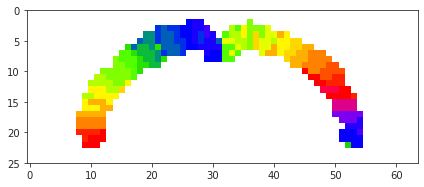

In [6]:
fig, ax = create_figure()
x = obj_all['sub-SLC02_ses-1']['cols'].numpy()
ax.imshow(mwh(x[..., 40].T == 0, x[..., 40].T), cmap='prism')
ax.set_ylim(25, 0)

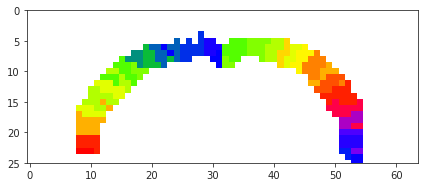

In [7]:
fig, ax = create_figure()
x = obj_all['sub-SLC09_ses-1']['cols'].numpy()
ax.imshow(mwh(x[..., 35].T == 0, x[..., 35].T), cmap='prism')
ax.set_ylim(25, 0);

## Fill ROIs 2d? (no longer needed)

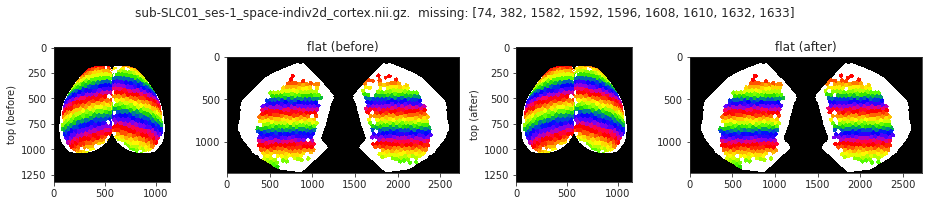

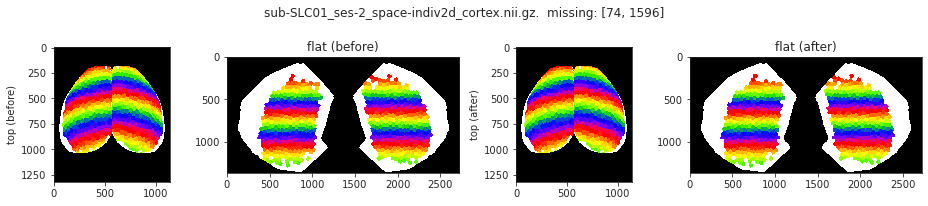

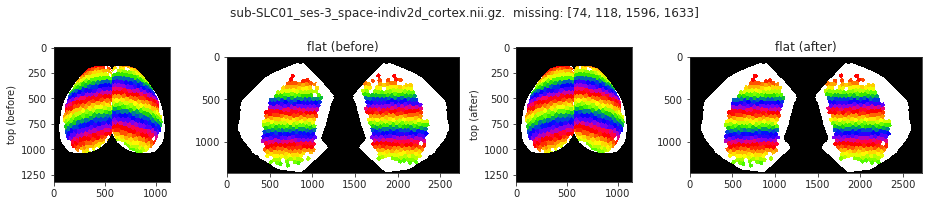

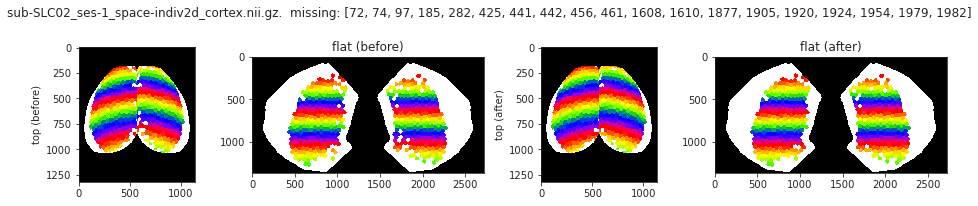

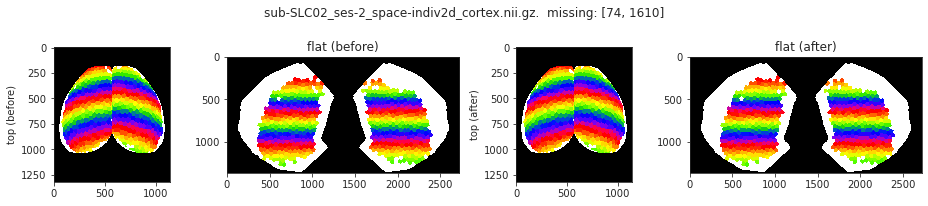

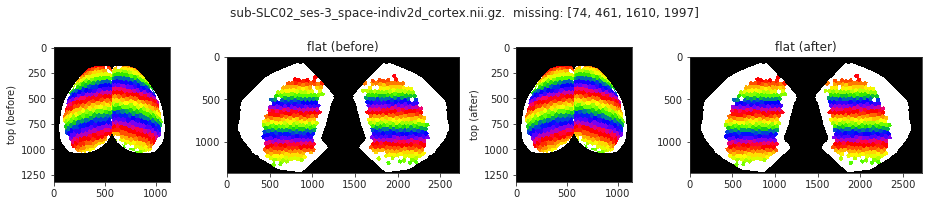

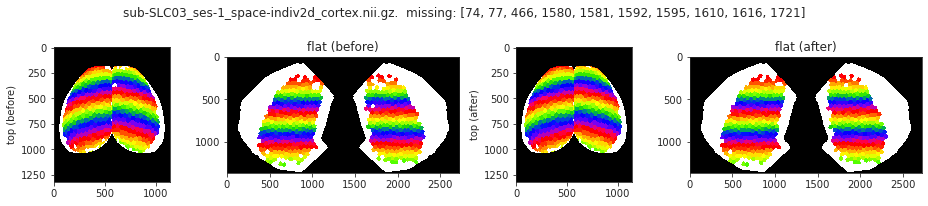

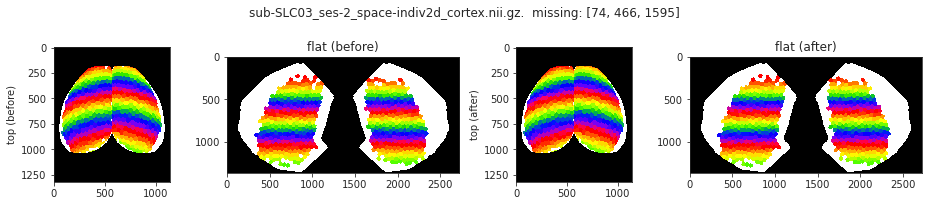

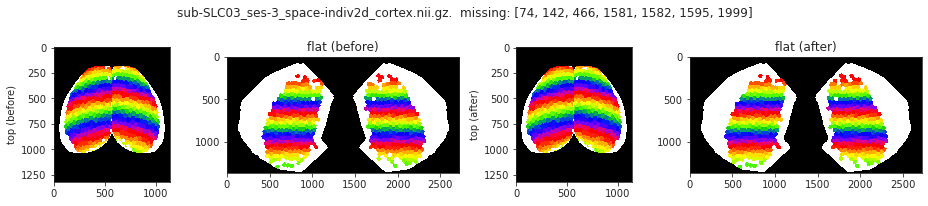

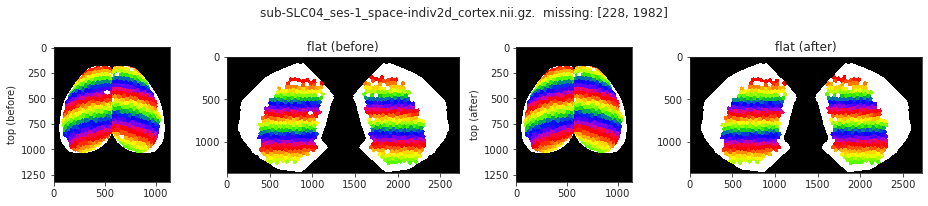

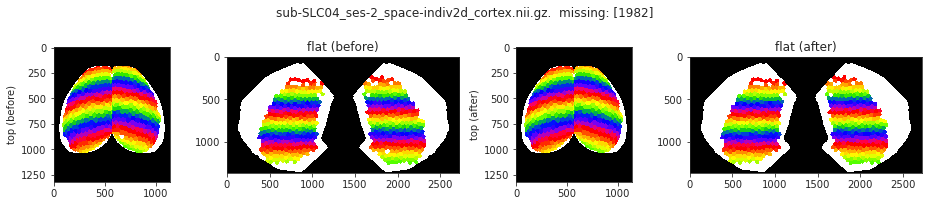

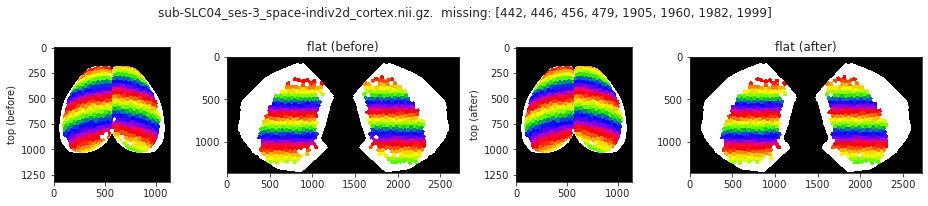

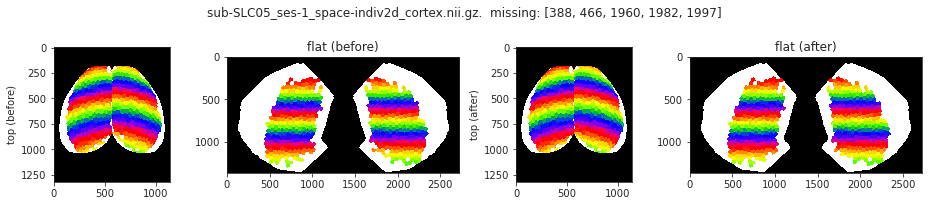

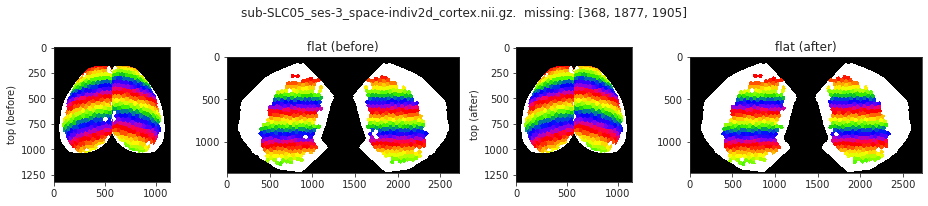

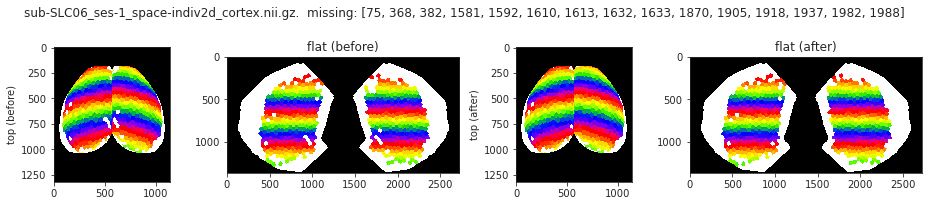

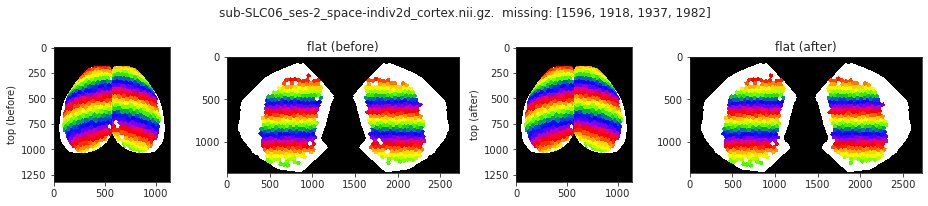

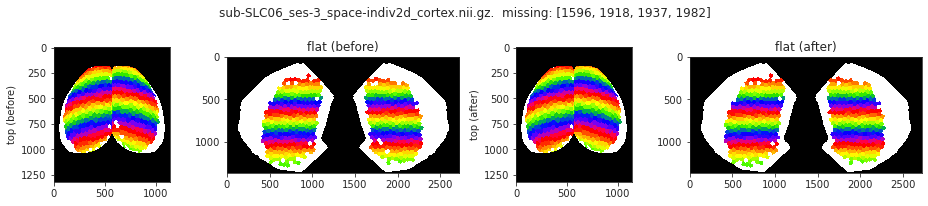

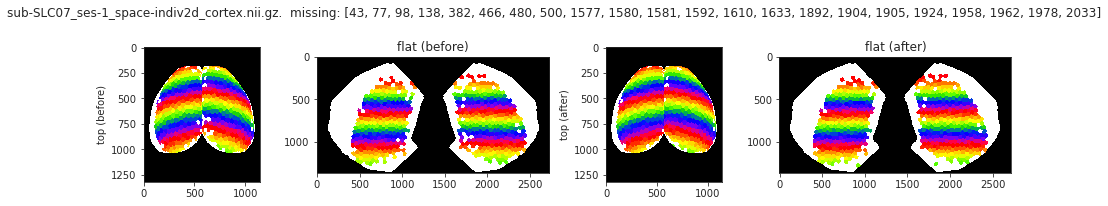

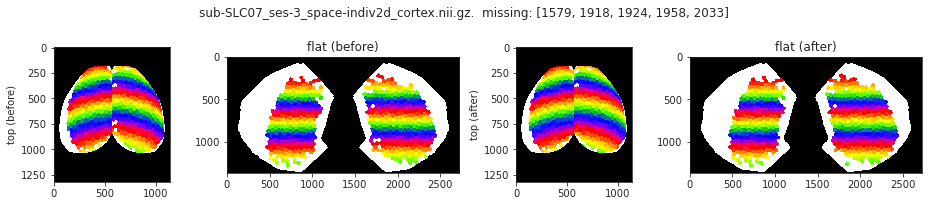

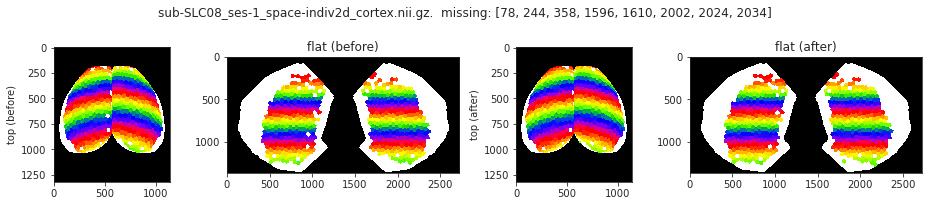

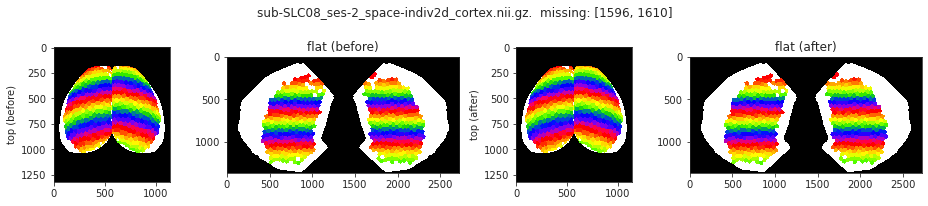

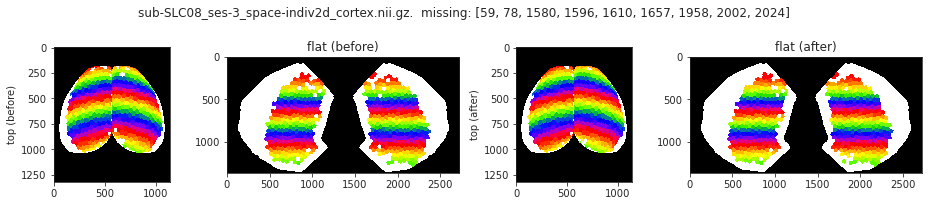

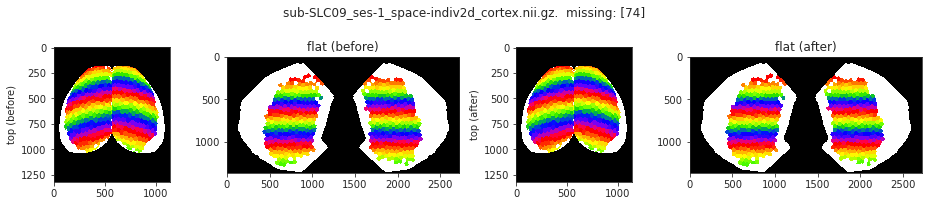

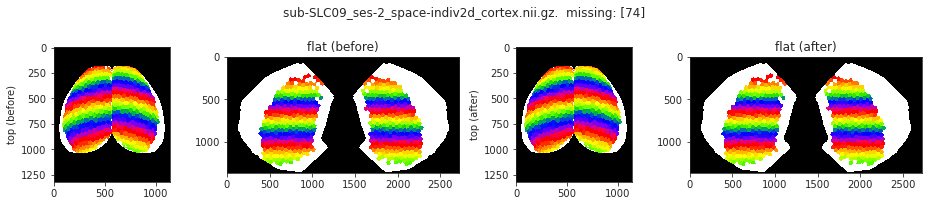

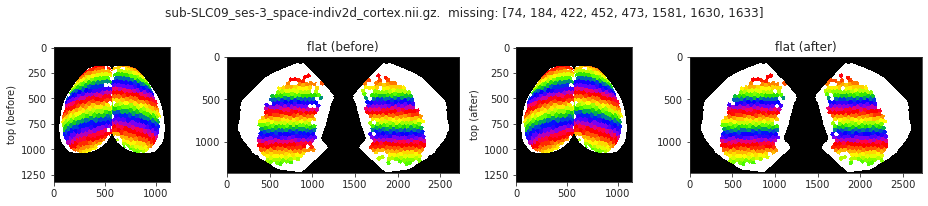

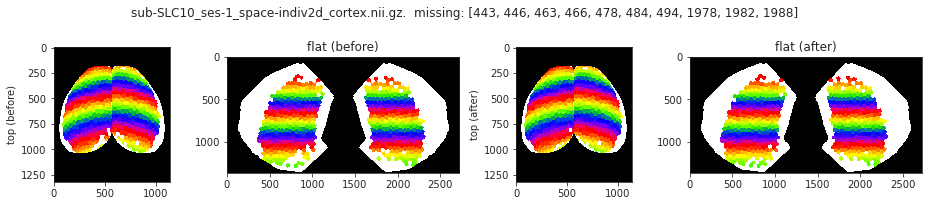

In [9]:
mice.parcel.fill_rois_2d(dry_run=True)

In [10]:
file = 'sub-SLC10_ses-1_space-indiv2d_cortex.nii.gz'
file = pjoin(mice.cfg.masks_dir, file)
ctx = ants.image_read(file)

file = 'sub-SLC10_ses-1_space-indiv2d_cols.nii.gz'
file = pjoin(mice.cfg.masks_dir, file)
col = ants.image_read(file)

ctx, col

(
    ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (512, 500, 1)
         Spacing    : (0.025, 0.025, 0.025)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (512, 500, 1)
         Spacing    : (0.025, 0.025, 0.025)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

)

In [11]:
ctx = ctx.numpy().squeeze()
col = col.numpy().squeeze()

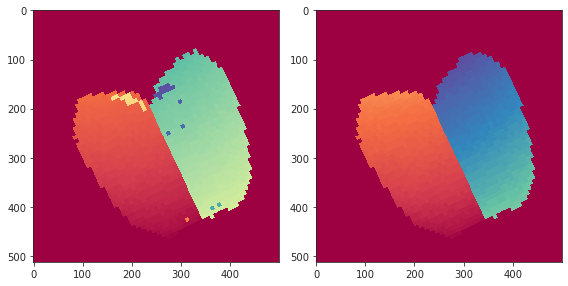

In [12]:
fig, axes = create_figure(1, 2, (8, 5))
axes[0].imshow(ctx, cmap='Spectral')
axes[1].imshow(col, cmap='Spectral')
plt.show()

In [13]:
regions_ctx = np.unique(ctx[ctx.nonzero()])
regions_col = np.unique(col[ctx.nonzero()])

len(regions_ctx), len(regions_col)

(564, 554)

In [14]:
hcl_ctx = mice.parcel.decode(regions_ctx)
hcl_col = mice.parcel.decode(regions_col)
(hcl_ctx[:, -1] == 0).sum(), (hcl_col[:, -1] == 0).sum()

(541, 553)

In [15]:
(hcl_ctx[:, -1] == 1).sum(), (hcl_col[:, -1] == 1).sum()

(23, 0)

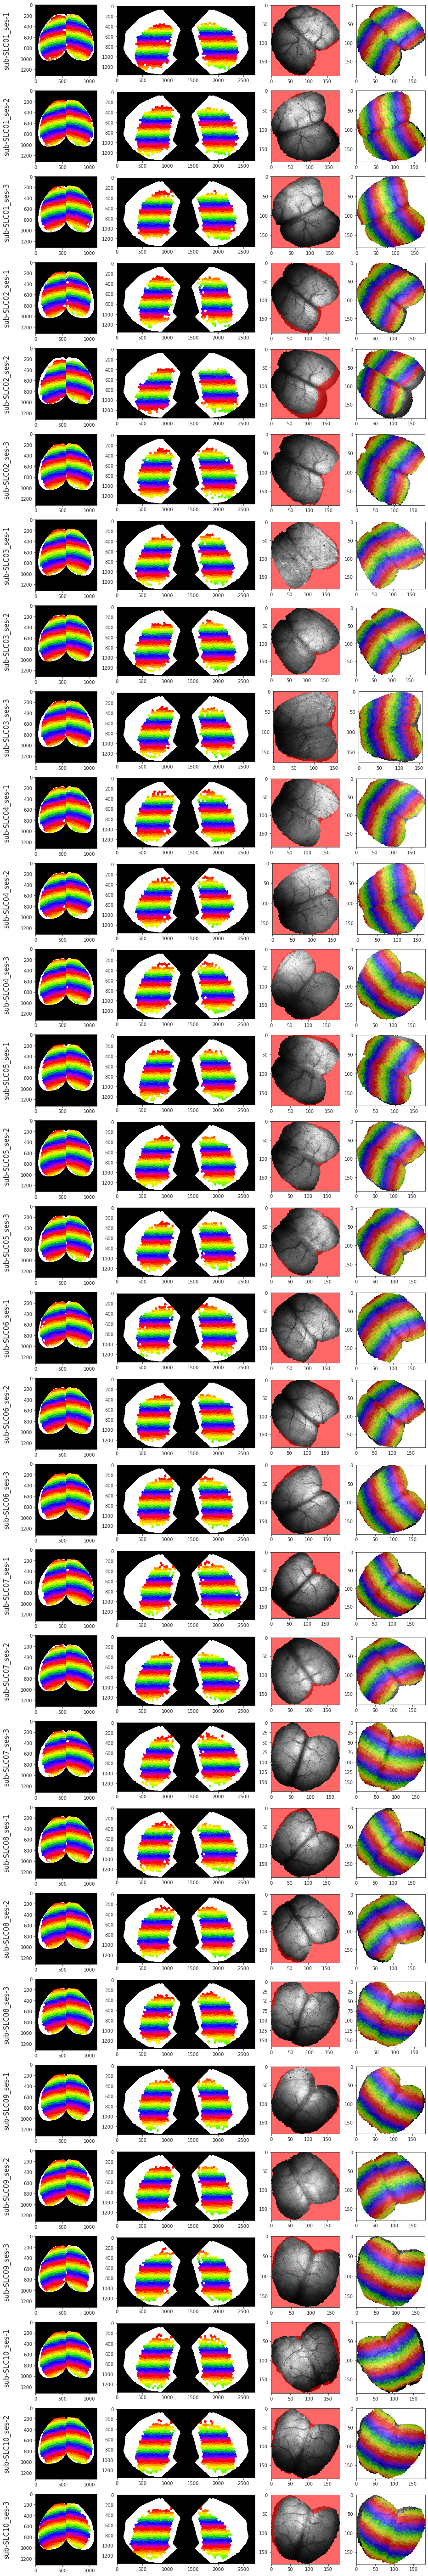

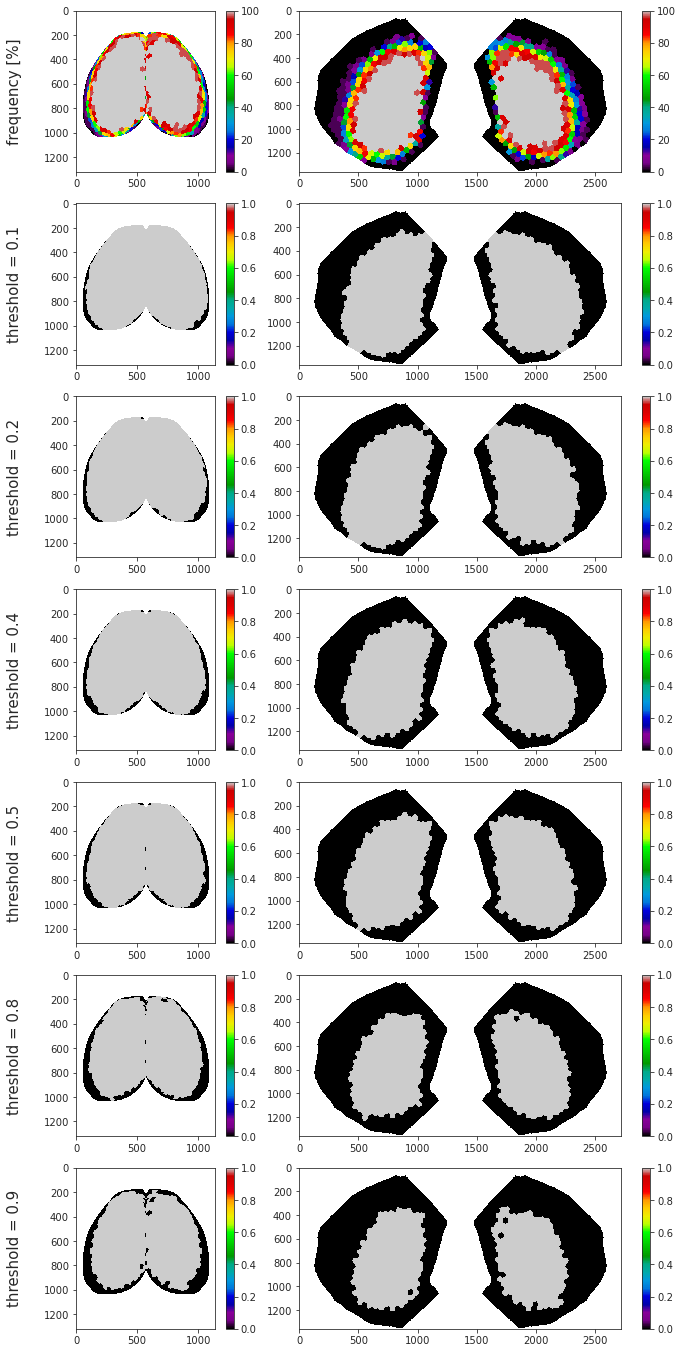

accept ratio: 84 %, reject ratio: 16 %, using a presence threshold of 10.0 %
a total of 618 regions were accepted

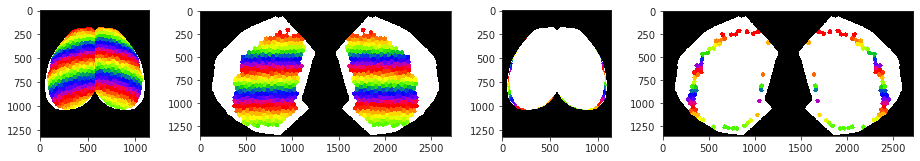

In [16]:
output = mice.parcel.show_accepted_regions_2d(mice)

In [63]:
reg = Register(mice)
reg.set_mode('ca2')

In [64]:
output = reg.get_accepted_regions(cutoff=0, thres=0.20)

Name: cortex . . . a total of: 542 regions accepted, 482 regions rejected.
accept ratio: 52.93 %, reject ratio: 47.07 %, using a presence threshold of 20.0 %

<AxesSubplot:ylabel='Count'>

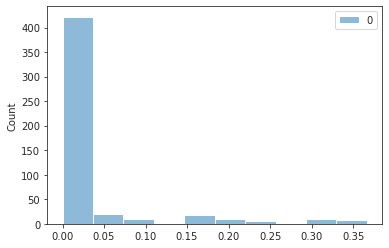

In [65]:
remove_ctx = {k: v for k, v in output['cortex']['freq'].items() if v < 0.4}
sns.histplot(remove_ctx.values())

In [66]:
regions_acc = output['cortex']['acc']
len(regions_acc)

542

In [67]:
f = 'parcel2d-top_10um.nii.gz'
f = pjoin(mice.cfg.parcel_dir, f)
parc_top = ants.image_read(f).numpy().astype(int)

<matplotlib.image.AxesImage object at 0x7f74407d7460>

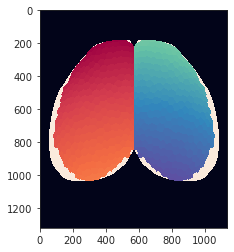

In [68]:
plt.imshow(parc_top > 0)
plt.imshow(mwh(~np.isin(parc_top, regions_acc), parc_top), cmap='Spectral')

<matplotlib.image.AxesImage object at 0x7f74e8312850>

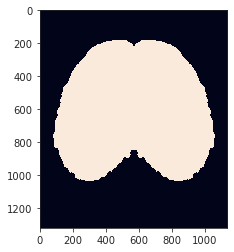

In [69]:
x = parc_top.copy()
x[~np.isin(parc_top, regions_acc)] = 0
plt.imshow(x > 0)